In [35]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [36]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Data Manipulation**

In [38]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
#Here we see that the TotalCharges has 11 missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
df[np.isnan(df['TotalCharges'])]
#It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
#Let's see if there are any other 0 values in the tenure column.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [40]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index
#dropping rows with tenure=0

Int64Index([], dtype='int64')

In [41]:
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [42]:
df = df.drop(['customerID'], axis = 1)

In [43]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod']

**DATA VISUALIZATION**

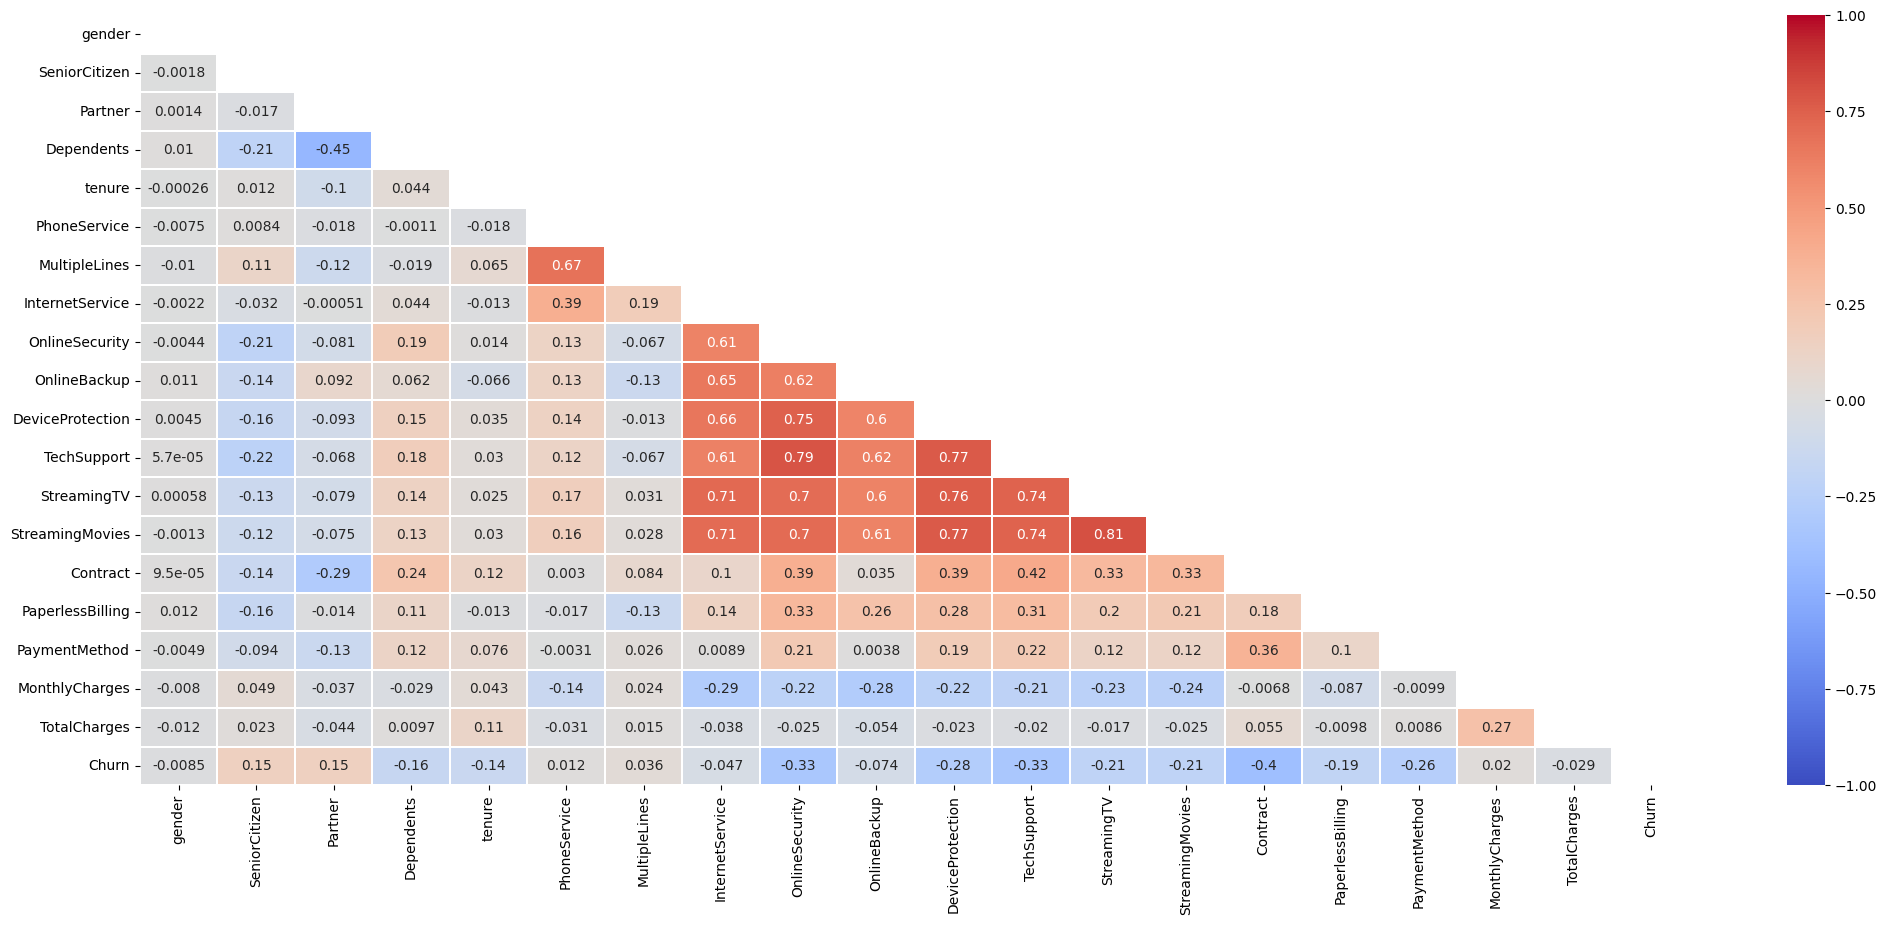

In [44]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [45]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()
#About half of the customers in our data set are male while the other half are female

Text(0.5, 1.0, '% of Senior Citizens')

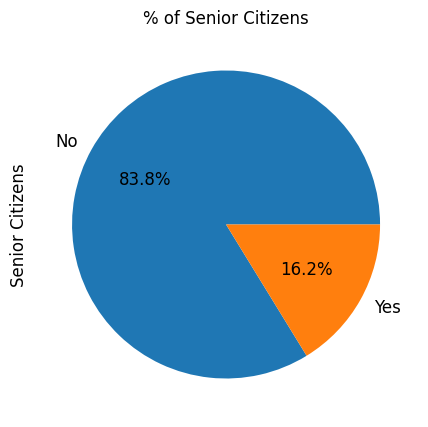

In [46]:
import matplotlib.ticker as mtick
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)
#There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Text(0.5, 1.0, 'Number of Customers by Contract Type')

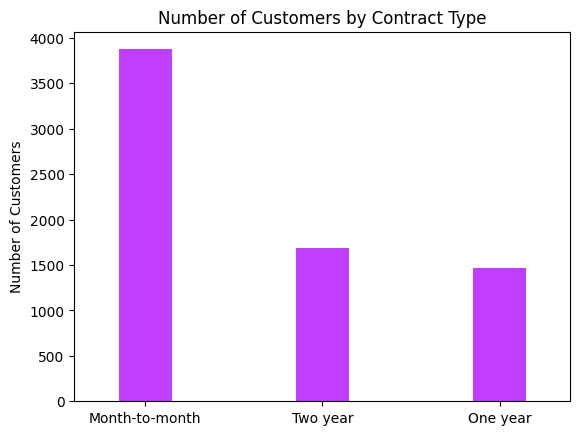

In [47]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=	'#BF3EFF')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')
#As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

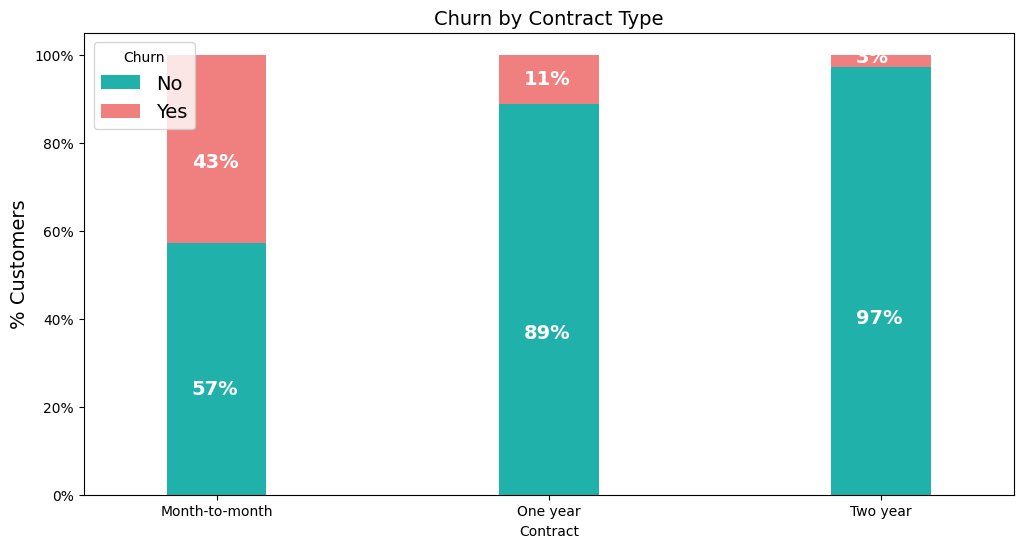

In [48]:
colors = ['#20B2AA','#F08080']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
 #Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

In [49]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [50]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

Text(0.5, 1.0, 'Distribution of total charges by churn')

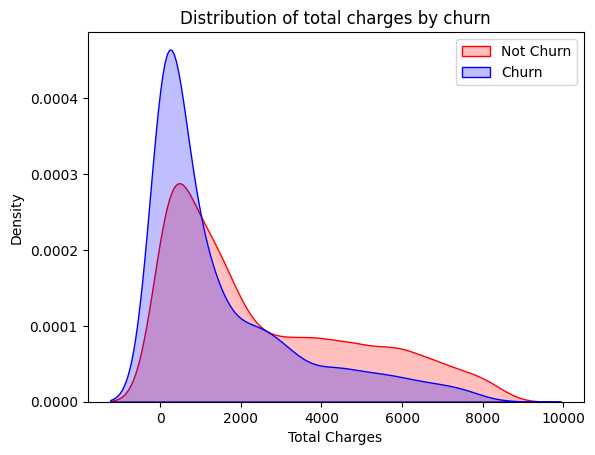

In [51]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

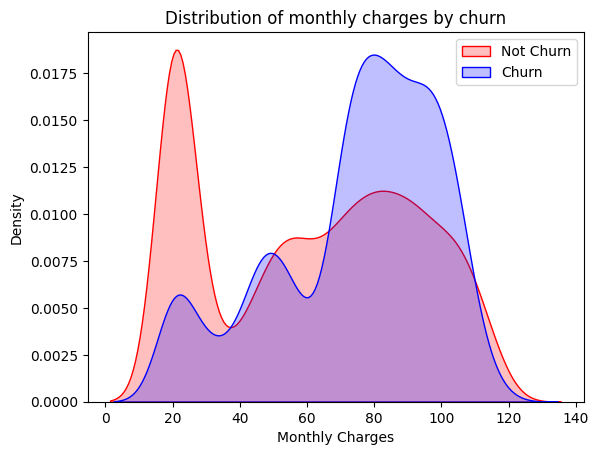

In [52]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
#Higher % of customers churn when the monthly charges are high.

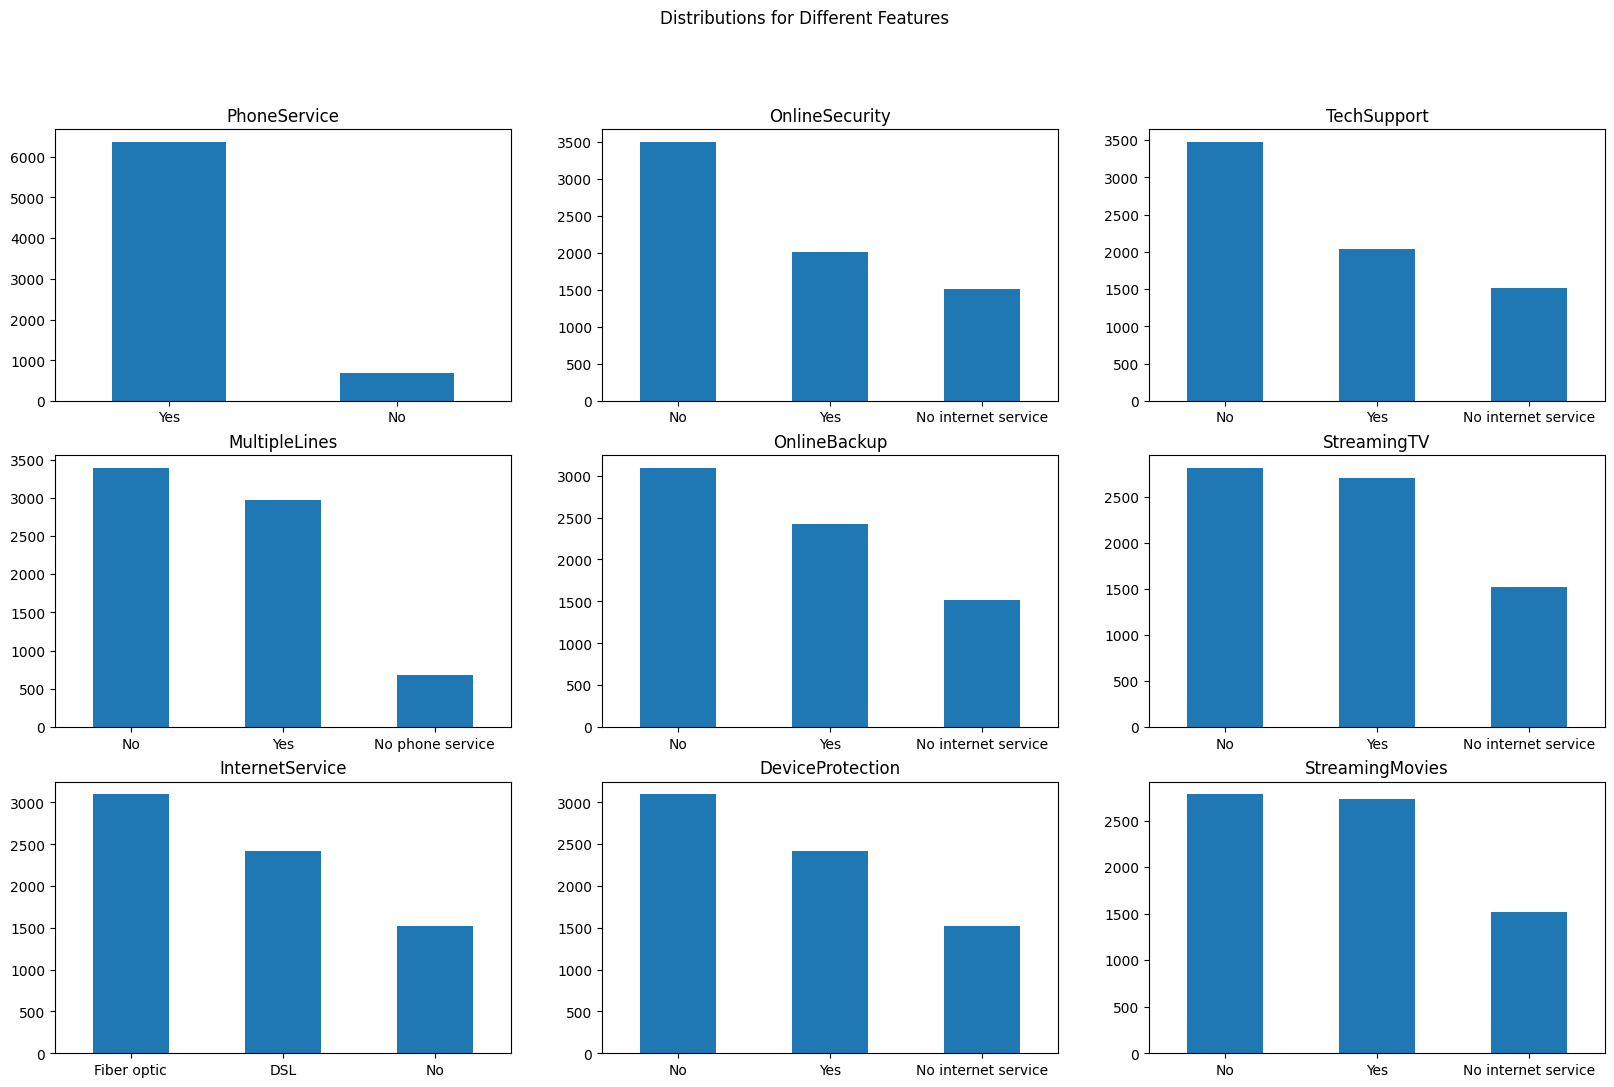

In [53]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,12))
fig.suptitle('Distributions for Different Features')
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

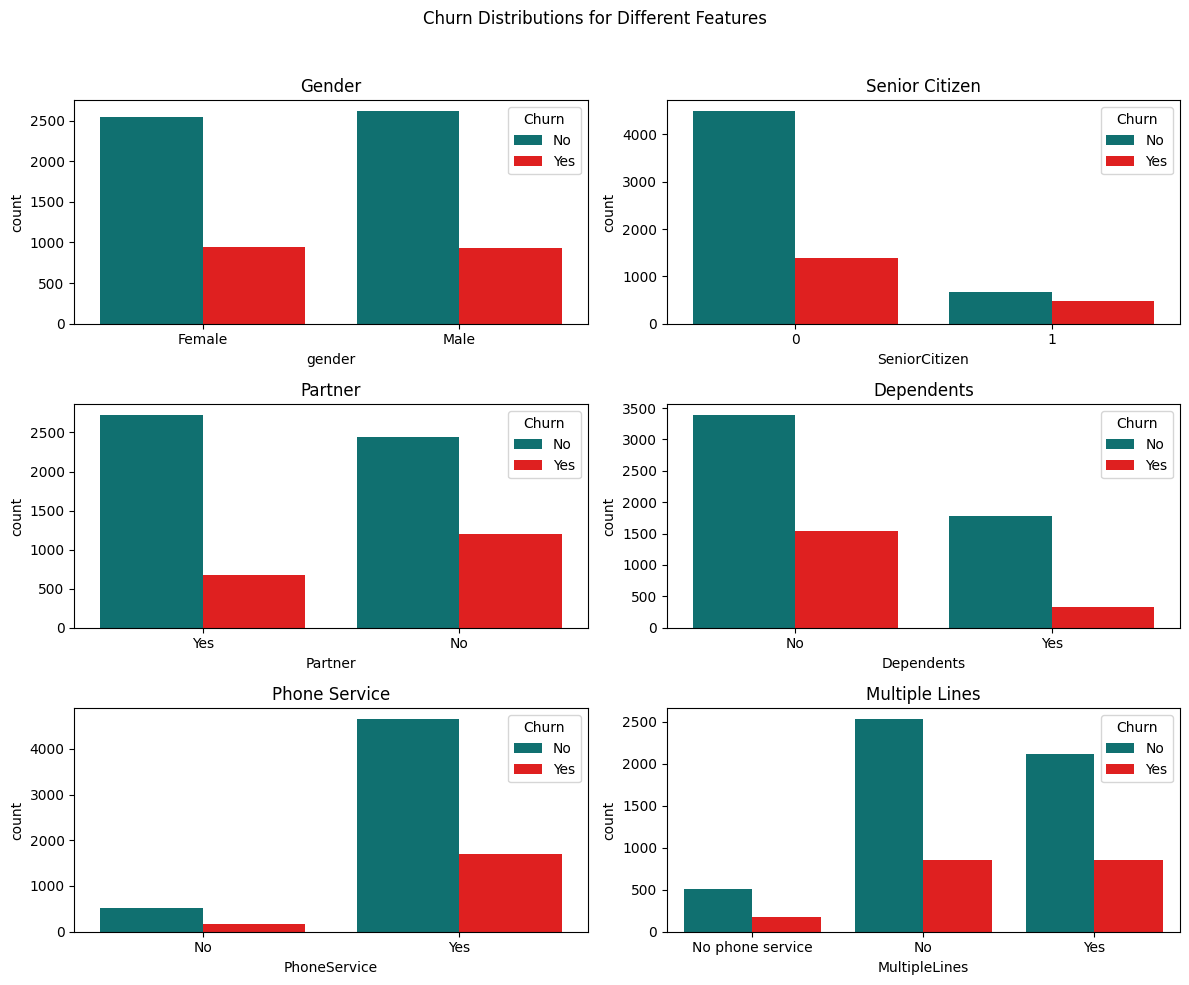

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# If 'Churn' is not binary, you may need to adjust the palette
churn_palette = {'No': 'teal', 'Yes': 'red'}

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Churn Distributions for Different Features')

# Plot 'gender'
sns.countplot(x='gender', hue='Churn', data=df, palette=churn_palette, ax=axes[0, 0])
axes[0, 0].set_title('Gender')

# Plot 'SeniorCitizen'
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette=churn_palette, ax=axes[0, 1])
axes[0, 1].set_title('Senior Citizen')

# Plot 'Partner'
sns.countplot(x='Partner', hue='Churn', data=df, palette=churn_palette, ax=axes[1, 0])
axes[1, 0].set_title('Partner')

# Plot 'Dependents'
sns.countplot(x='Dependents', hue='Churn', data=df, palette=churn_palette, ax=axes[1, 1])
axes[1, 1].set_title('Dependents')

# Plot 'PhoneService'
sns.countplot(x='PhoneService', hue='Churn', data=df, palette=churn_palette, ax=axes[2, 0])
axes[2, 0].set_title('Phone Service')

# Plot 'MultipleLines'
sns.countplot(x='MultipleLines', hue='Churn', data=df, palette=churn_palette, ax=axes[2, 1])
axes[2, 1].set_title('Multiple Lines')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


Gender - The churn percent is almost equal in case of Male and Females

The percent of churn is higher in case of senior citizens

Customers with Partners and Dependents have lower churn rate as compared to those who don't have partners & Dependents.

**Data PreProcessing**

In [55]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [56]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [57]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['Churn']), df['Churn'].values, test_size=0.3, random_state=40, stratify=df['Churn'])

# Step 2: Split temp into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40, stratify=y_temp)

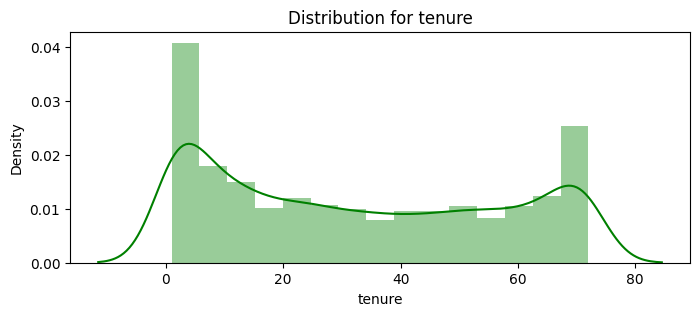

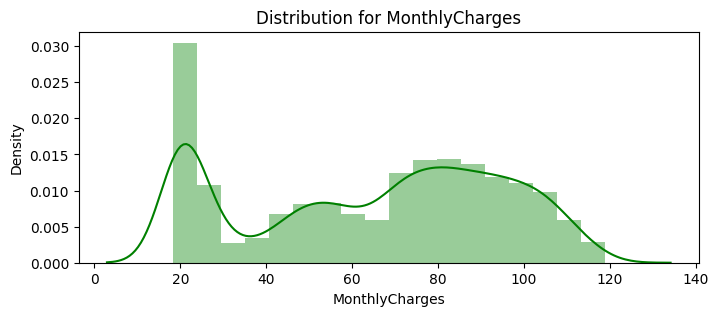

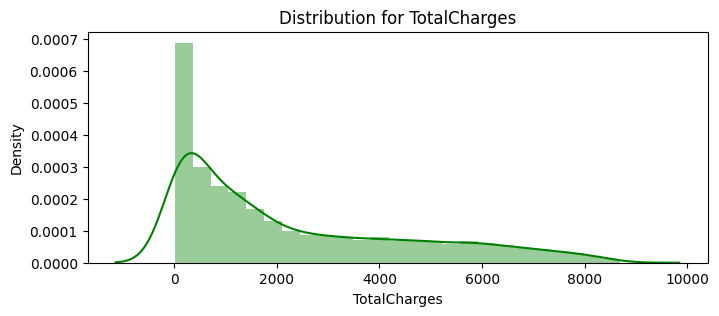

In [58]:
def distplot(feature, frame, color='g'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

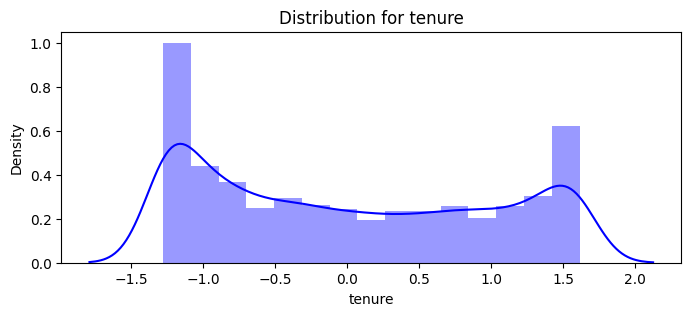

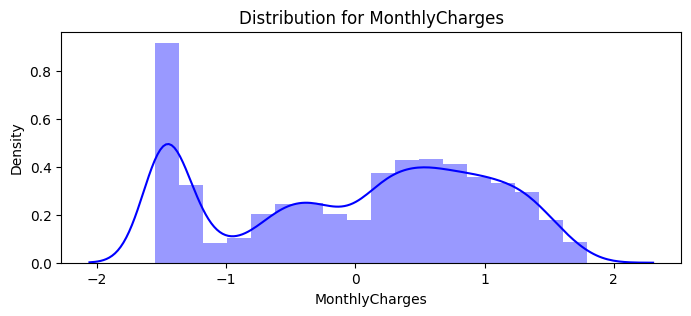

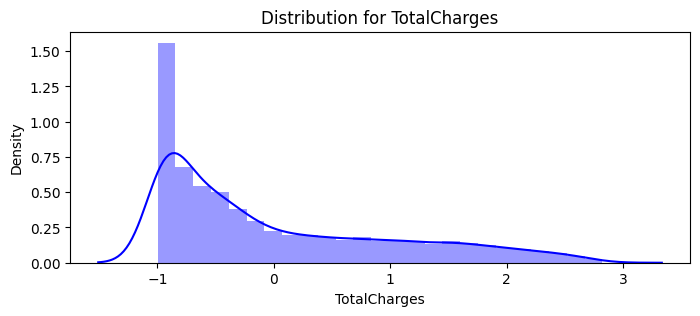

In [59]:
#Standardization of numerical attritibutes
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='b')

In [63]:
# # Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

# cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
# cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding
scaler= StandardScaler()

# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [66]:
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']
num_cols = list(X_train.select_dtypes(include=['number']).columns)
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))

# Step 3: Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat_ohe', OneHotEncoder(drop='first'), cat_cols_ohe),
        ('cat_le', LabelEncoder(), cat_cols_le)
    ])
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_validation[num_cols] = scaler.transform(X_validation[num_cols])
y_validation[num_cols] = scaler.transform(y_validation[num_cols])
# Step 4: Fit and transform the training set
X_train = preprocessor.fit_transform(X_train)

# Step 5: Transform the validation and test sets using the same transformer
X_validation = preprocessor.transform(X_validation)
X_test = preprocessor.transform(X_test)

**Machine Learning Model Evaluations and Predictions**

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.model_selection import train_test_split

In [68]:
# Create KNN model
knn_model = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': [5, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best model
best_knn_model = grid_search.best_estimator_

# Predict using the best model
predicted_y = best_knn_model.predict(X_test)

# Evaluate the best model
accuracy_knn = accuracy_score(y_test, predicted_y)
confusion_knn = confusion_matrix(y_test, predicted_y)

predicted_y_validation = best_knn_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_knn_validation = accuracy_score(y_validation, predicted_y_validation)
confusion_knn_validation = confusion_matrix(y_validation, predicted_y_validation)

print("RF validation accuracy :" ,accuracy_knn_validation)
print("RF test accuracy :" ,accuracy_knn)

RF validation accuracy : 0.7971563981042654
RF test accuracy : 0.7791469194312797


In [81]:
from sklearn.model_selection import RandomizedSearchCV
# Random Forest
rf_model = RandomForestClassifier()  # Create a new instance
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}
rf_grid_search =RandomizedSearchCV(rf_model, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', refit=True, random_state=42)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
rf_predicted_y = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_predicted_y)
confusion_rf = confusion_matrix(y_test, rf_predicted_y)

rf_predicted_y_validation = best_rf_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_rf_validation = accuracy_score(y_validation, rf_predicted_y_validation)
confusion_rf_validation = confusion_matrix(y_validation, rf_predicted_y_validation)

print("RF validation accuracy :" ,accuracy_rf_validation)
print("RF test accuracy :" ,accuracy_rf)

RF validation accuracy : 0.8132701421800947
RF test accuracy : 0.8018957345971564


In [71]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', refit=True)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_
svm_predicted_y = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_predicted_y)
confusion_svm = confusion_matrix(y_test, svm_predicted_y)
svm_predicted_y_validation = best_svm_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_svm_validation = accuracy_score(y_validation, svm_predicted_y_validation)
confusion_svm_validation = confusion_matrix(y_validation, rf_predicted_y_validation)

print("SVM validation accuracy /n:" ,accuracy_svm_validation)
print("SVM test accuracy /n:" ,accuracy_svm)
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', refit=True)
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_
dt_predicted_y = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_predicted_y)
confusion_dt = confusion_matrix(y_test, dt_predicted_y)
dt_predicted_y_validation = best_dt_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_dt_validation = accuracy_score(y_validation, dt_predicted_y_validation)
confusion_dt_validation = confusion_matrix(y_validation, dt_predicted_y_validation)

print("DT validation accuracy /n:" ,accuracy_dt_validation)
print("DT test accuracy /n:" ,accuracy_dt)


# Logistic Regression
lr_model = LogisticRegression()
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', refit=True)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_
lr_predicted_y = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_predicted_y)
confusion_lr = confusion_matrix(y_test, lr_predicted_y)
lr_predicted_y_validation = best_lr_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_lr_validation = accuracy_score(y_validation, lr_predicted_y_validation)
confusion_lr_validation = confusion_matrix(y_validation, lr_predicted_y_validation)

print("LR validation accuracy :" ,accuracy_lr_validation)
print("LR test accuracy :" ,accuracy_lr)

SVM validation accuracy /n: 0.8075829383886256
SVM test accuracy /n: 0.790521327014218
DT validation accuracy /n: 0.7867298578199052
DT test accuracy /n: 0.7658767772511849
LR validation accuracy /n: 0.8180094786729858
LR test accuracy /n: 0.7943127962085308


**Evaluations**

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# Print results for the best model
print("\n----- Best K-Nearest Neighbors Model Results -----")
mse_knn = mean_squared_error(y_test, predicted_y)
rmse_knn = mean_squared_error(y_test, predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_knn = mean_absolute_error(y_test, predicted_y)

# Calculate R2 score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:")
print(confusion_knn)
TN, FP, FN, TP = confusion_knn.ravel()
# Calculate specificity
specificity = TN / (TN + FP)
print("Specificity:",specificity)
print("Classification Report:")
print(classification_report(y_test, predicted_y))
print(f"Best KNN Parameters: {grid_search.best_params_}")
best_k_value = grid_search.best_params_['n_neighbors']
print(f"The optimal value of k (number of neighbors) is: {best_k_value}")
print(f"Accuracy: {accuracy_knn:.4f}")



----- Best K-Nearest Neighbors Model Results -----
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}
Accuracy: 0.7791
Confusion Matrix:
[[664 111]
 [122 158]]
Specificity: 0.8567741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       775
           1       0.59      0.56      0.58       280

    accuracy                           0.78      1055
   macro avg       0.72      0.71      0.71      1055
weighted avg       0.78      0.78      0.78      1055

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}
The optimal value of k (number of neighbors) is: 21
Accuracy: 0.7791


In [73]:
print("\n----- Best SVM Results -----")
# Calculate MSE and RMSE
mse_svm = mean_squared_error(y_test, svm_predicted_y)
rmse_svm = mean_squared_error(y_test, svm_predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_svm = mean_absolute_error(y_test, svm_predicted_y)


print(f"Accuracy: {accuracy_svm:.4f}")
TN, FP, FN, TP = confusion_svm.ravel()
specificity_svm = TN / (TN + FP)
print("Specificity:",specificity_svm)
print(f"Best SVM Parameters: {svm_grid_search.best_params_}")
print("Confusion Matrix:")
print(confusion_svm)
print("Classification Report:")
print(classification_report(y_test, svm_predicted_y))



----- Best SVM Results -----
Accuracy: 0.7905
Specificity: 0.9058064516129032
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix:
[[702  73]
 [148 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       775
           1       0.64      0.47      0.54       280

    accuracy                           0.79      1055
   macro avg       0.73      0.69      0.70      1055
weighted avg       0.78      0.79      0.78      1055



In [74]:
print("\n----- Best Decision Tree Results -----")
# Calculate MSE and RMSE
mse_dt = mean_squared_error(y_test, dt_predicted_y)
rmse_dt = mean_squared_error(y_test, dt_predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_dt = mean_absolute_error(y_test, dt_predicted_y)


print(f"Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:")
print(confusion_dt)
TN, FP, FN, TP = confusion_dt.ravel()
specificity_dt = TN / (TN + FP)
print("Specificity:",specificity_dt)
print(f"Best Parameters: {dt_grid_search.best_params_}")
print("Classification Report:")
print(classification_report(y_test, dt_predicted_y))



----- Best Decision Tree Results -----
Accuracy: 0.7659
Confusion Matrix:
[[654 121]
 [126 154]]
Specificity: 0.8438709677419355
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       775
           1       0.56      0.55      0.55       280

    accuracy                           0.77      1055
   macro avg       0.70      0.70      0.70      1055
weighted avg       0.76      0.77      0.77      1055



In [75]:
print("\n----- Best Logistic Regression Results -----")
# Calculate MSE and RMSE
mse_lr = mean_squared_error(y_test, lr_predicted_y)
rmse_lr = mean_squared_error(y_test, lr_predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_lr = mean_absolute_error(y_test, lr_predicted_y)

print(f"Accuracy: {accuracy_lr:.4f}")
print("Confusion Matrix:")
print(confusion_lr)
TN, FP, FN, TP = confusion_lr.ravel()
specificity_lr = TN / (TN + FP)
print("Specificity:",specificity_lr)
print(f"Best logistic Regression Parameters: {lr_grid_search.best_params_}")
print("Classification Report:")
print(classification_report(y_test, lr_predicted_y))



----- Best Logistic Regression Results -----
Accuracy: 0.7943
Confusion Matrix:
[[683  92]
 [125 155]]
Specificity: 0.8812903225806452
Best logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       775
           1       0.63      0.55      0.59       280

    accuracy                           0.79      1055
   macro avg       0.74      0.72      0.73      1055
weighted avg       0.79      0.79      0.79      1055



In [76]:
print("\n----- Best Random Forest Model Results -----")
mse_rf = mean_squared_error(y_test, rf_predicted_y)
rmse_rf = mean_squared_error(y_test, rf_predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_rf = mean_absolute_error(y_test, rf_predicted_y)


print(f"Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:")
print(confusion_rf)
TN, FP, FN, TP = confusion_rf.ravel()
specificity_rf = TN / (TN + FP)
print("Specificity:",specificity_rf)
print("Best Parameters:", rf_grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, rf_predicted_y))
print(f"Accuracy: {accuracy_rf:.4f}")



----- Best Random Forest Model Results -----
Accuracy: 0.7934
Confusion Matrix:
[[690  85]
 [133 147]]
Specificity: 0.8903225806451613
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       775
           1       0.63      0.53      0.57       280

    accuracy                           0.79      1055
   macro avg       0.74      0.71      0.72      1055
weighted avg       0.78      0.79      0.79      1055

Accuracy: 0.7934


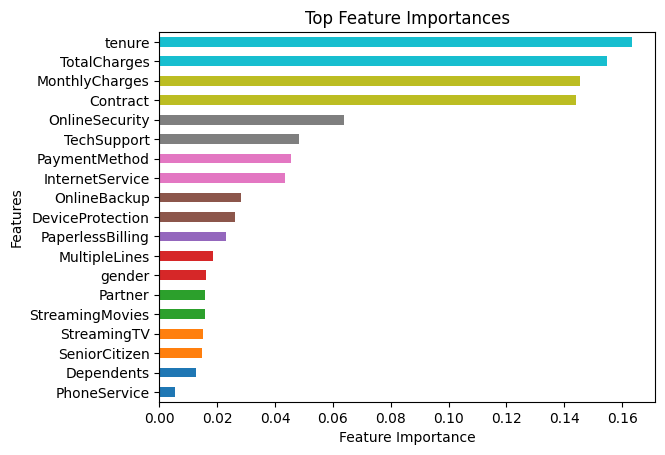

In [77]:
best_rf_model = rf_grid_search.best_estimator_

# Access feature importances from the best model
importances = best_rf_model.feature_importances_
importances = best_rf_model.feature_importances_
weights = pd.Series(importances, index=X.columns.values)

color_map = 'tab10'

# Plotting with different colors for each feature
weights.sort_values().plot(kind='barh', color=plt.cm.get_cmap(color_map)(np.linspace(0, 1, len(weights))))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Feature Importances')
plt.show()
#Observations: From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.


**Comparative analysis**

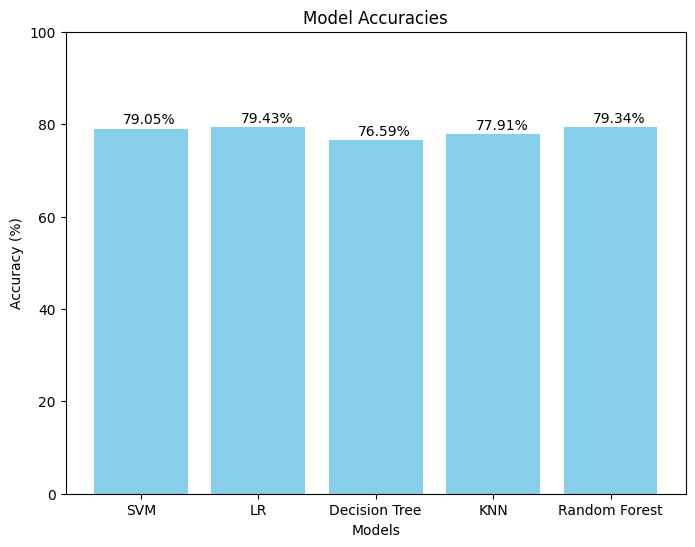

In [78]:
accuracies = {
    'SVM': accuracy_svm,
    'LR': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'KNN': accuracy_knn,
    'Random Forest': accuracy_rf
}

# Convert accuracy values to percentages
accuracy_values_percentage = [acc * 100 for acc in accuracies.values()]

models = list(accuracies.keys())

# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_values_percentage, color='skyblue')

# Adding titles and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Setting y-axis limits from 0 to 100 for percentage range

# Adding percentages on top of the bars
for bar, acc_percentage in zip(bars, accuracy_values_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'{acc_percentage:.2f}%', fontsize=10, color='black')

# Display the plot
plt.show()


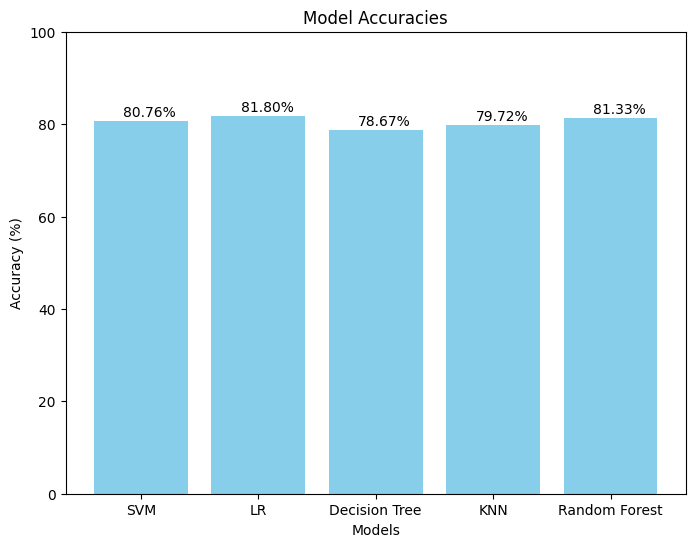

In [82]:
accuracies = {
    'SVM': accuracy_svm_validation,
    'LR': accuracy_lr_validation,
    'Decision Tree': accuracy_dt_validation,
    'KNN': accuracy_knn_validation,
    'Random Forest': accuracy_rf_validation
}

# Convert accuracy values to percentages
accuracy_values_percentage = [acc * 100 for acc in accuracies.values()]

models = list(accuracies.keys())

# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_values_percentage, color='skyblue')

# Adding titles and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Setting y-axis limits from 0 to 100 for percentage range

# Adding percentages on top of the bars
for bar, acc_percentage in zip(bars, accuracy_values_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'{acc_percentage:.2f}%', fontsize=10, color='black')

# Display the plot
plt.show()
